In [1]:
!pip install shap treeinterpreter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 4.4 MB/s eta 0:00:00


# Breakdown of the Code:

1. **Loaded the Iris Dataset and Trained a Random Forest Model**:
   - We imported the Iris dataset and trained a `RandomForestClassifier` model using this dataset.
   - This provided the basis for generating predictions and analyzing feature importance.

2. **Extracted Predictions, Bias, and Feature Contributions Using TreeInterpreter**:
   - Using the `treeinterpreter` library, we obtained the model's predictions, bias terms, and the contributions of each feature to those predictions.
   - This step was crucial for breaking down the model's predictions into interpretable components.

3. **Selected Contributions for a Specific Class**:
   - We focused on the contributions for Class 0 by selecting the corresponding slice from the `contributions` array.
   - This allowed us to visualize the contributions specifically for that class.

4. **Created a SHAP Explanation Object from TreeInterpreter Contributions**:
   - We wrapped the `treeinterpreter` contributions in a SHAP `Explanation` object.
   - This object included the feature contributions (`shap_values`), base values (`bias`), the original input data (`X`), and the feature names.

5. **Generated a SHAP Summary Plot**:
   - We created a SHAP summary plot (often visualized as a beeswarm plot) to show the distribution of SHAP values for each feature across all instances.
   - This plot helped us understand which features had the most significant impact on the predictions.

6. **Generated a SHAP Waterfall Plot**:
   - We generated a waterfall plot to visualize the contributions of each feature to the prediction of a single instance (the first instance in this case).
   - This detailed visualization helped us understand how individual feature values contributed to the model's output for a specific prediction.

7. **Generated a SHAP Bar Plot**:
   - We computed the mean absolute SHAP values across all instances and used them to create a bar plot.
   - This plot showed the overall importance of each feature in the model, indicating which features were most influential across the entire dataset.

8. **Effectively Leveraged SHAP’s Visualization Framework**:
   - By converting `treeinterpreter` outputs into a SHAP `Explanation` object, we utilized SHAP's powerful visualization tools to analyze and interpret the model’s predictions and feature importance comprehensively.

## Example 1

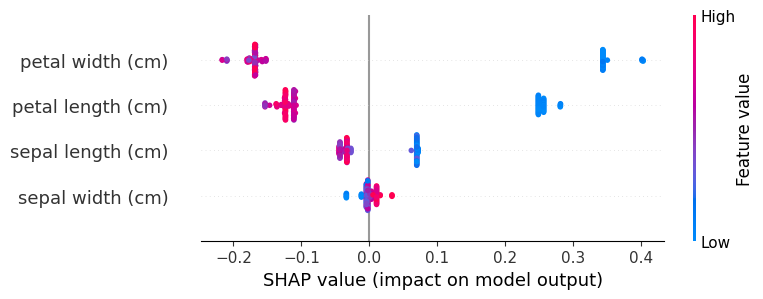

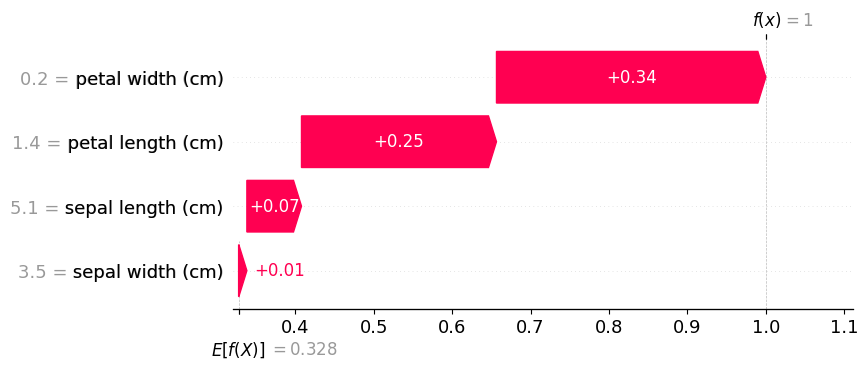

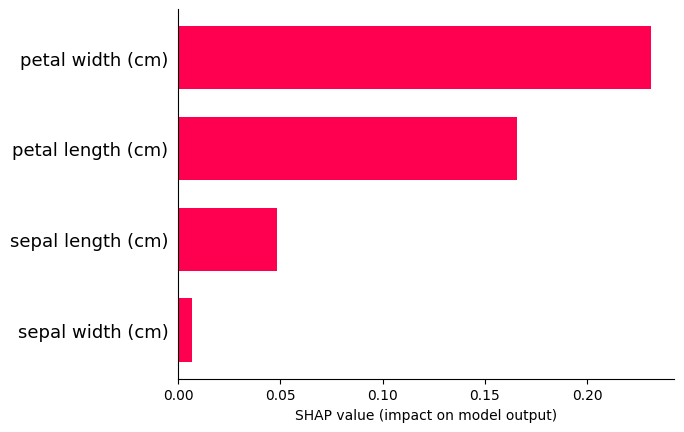

In [2]:
import numpy as np
import shap
from treeinterpreter import treeinterpreter as ti
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Load dataset and train a model
data = load_iris()
X, y = data.data, data.target
model = RandomForestClassifier()
model.fit(X, y)

# Use treeinterpreter to get the prediction, bias, and contributions
prediction, bias, contributions = ti.predict(model, X)

# contributions.shape is (n_samples, n_features, n_classes)
# We reduce the dimensionality by selecting one class
shap_values = contributions[:, :, 0]  # Choose class 0 for visualization

# Creating a SHAP Explanation object
explainer = shap.Explainer(model)
shap_object = shap.Explanation(
    values=shap_values,
    base_values=bias[:, 0],  # Base values should match the selected class
    data=X,
    feature_names=data.feature_names
)

# Generate SHAP plots
shap.summary_plot(shap_object.values, shap_object.data, feature_names=shap_object.feature_names)
shap.waterfall_plot(shap_object[0])  # Example for the first instance

# For the bar plot, extract the mean absolute values across all instances
mean_abs_shap_values = np.abs(shap_object.values).mean(axis=0)
shap.bar_plot(mean_abs_shap_values, feature_names=shap_object.feature_names)

## Example 2

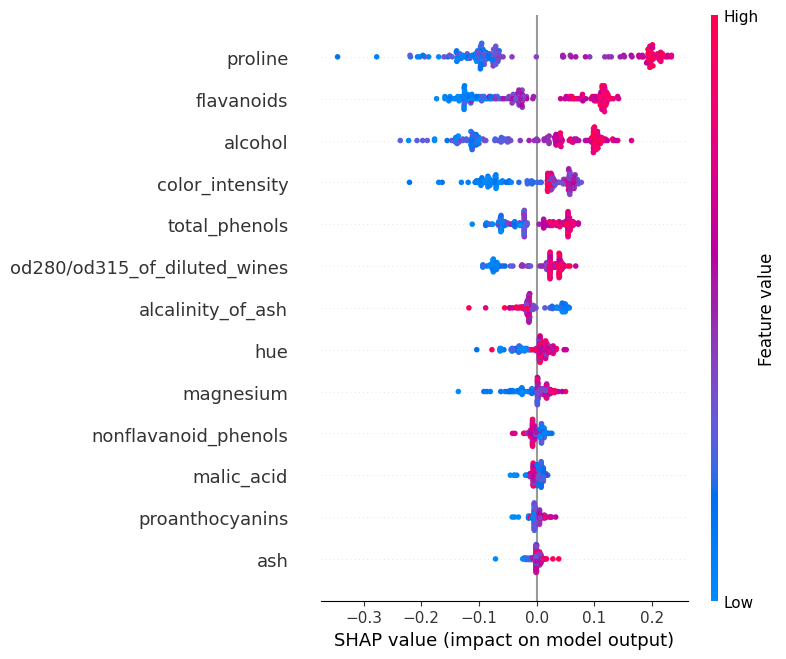

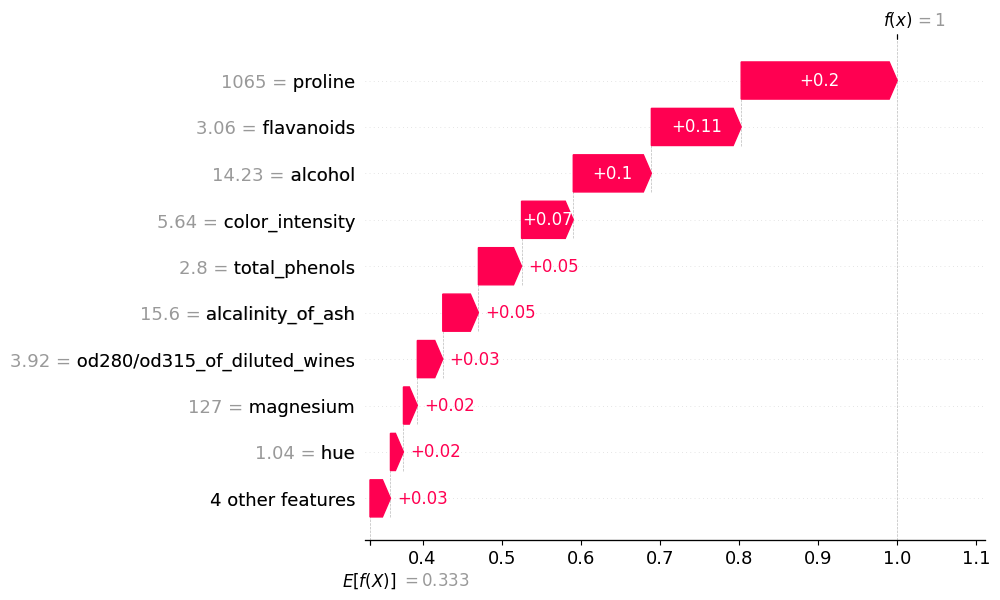

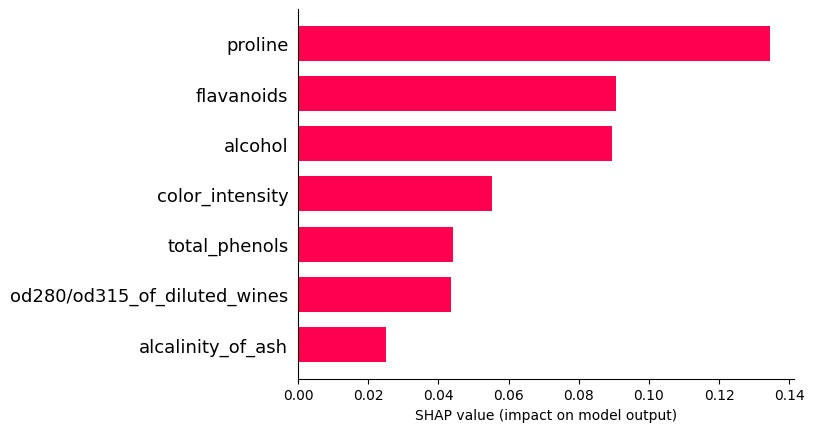

In [ ]:
import numpy as np
import shap
from treeinterpreter import treeinterpreter as ti
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier

# Load the Wine dataset
data = load_wine()
X, y = data.data, data.target
model = RandomForestClassifier()
model.fit(X, y)

# Use treeinterpreter to get the prediction, bias, and contributions
prediction, bias, contributions = ti.predict(model, X)

# contributions.shape is (n_samples, n_features, n_classes)
# We reduce the dimensionality by selecting one class
shap_values = contributions[:, :, 0]  # Choose class 0 for visualization

# Creating a SHAP Explanation object
explainer = shap.Explainer(model)
shap_object = shap.Explanation(
    values=shap_values,
    base_values=bias[:, 0],  # Base values should match the selected class
    data=X,
    feature_names=data.feature_names
)

# Generate SHAP plots
shap.summary_plot(shap_object.values, shap_object.data, feature_names=shap_object.feature_names)
shap.waterfall_plot(shap_object[0])  # Example for the first instance

# For the bar plot, extract the mean absolute values across all instances
mean_abs_shap_values = np.abs(shap_object.values).mean(axis=0)
shap.bar_plot(mean_abs_shap_values, feature_names=shap_object.feature_names)

Shape of SHAP values: (178, 13)
Summary of SHAP values:
[ 0.10576179  0.09493164  0.06580366 -0.12364406 -0.00093674  0.17790497
  0.10094714  0.07675533  0.06444423  0.22452853  0.10943708 -0.16208315
 -0.66385042]


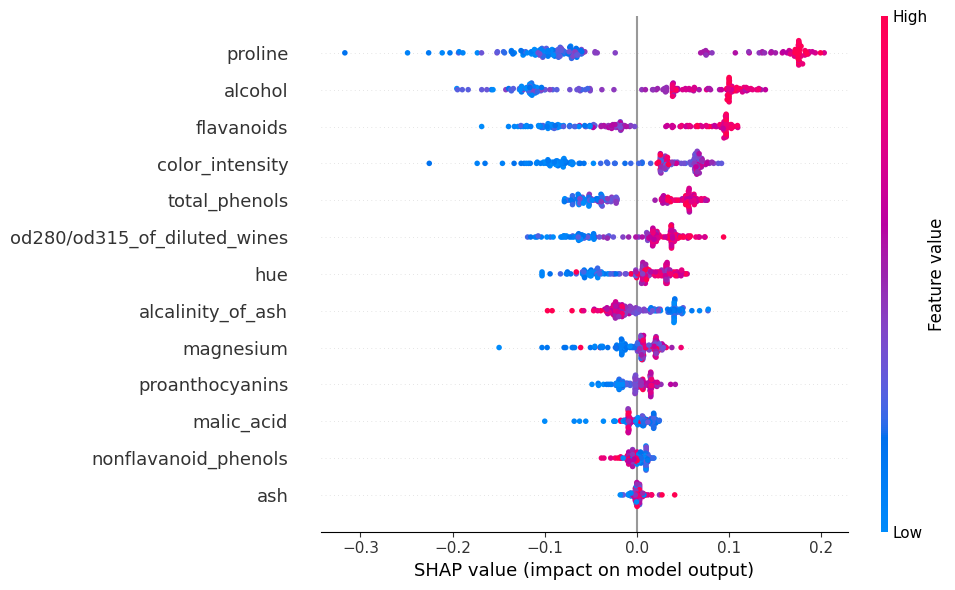

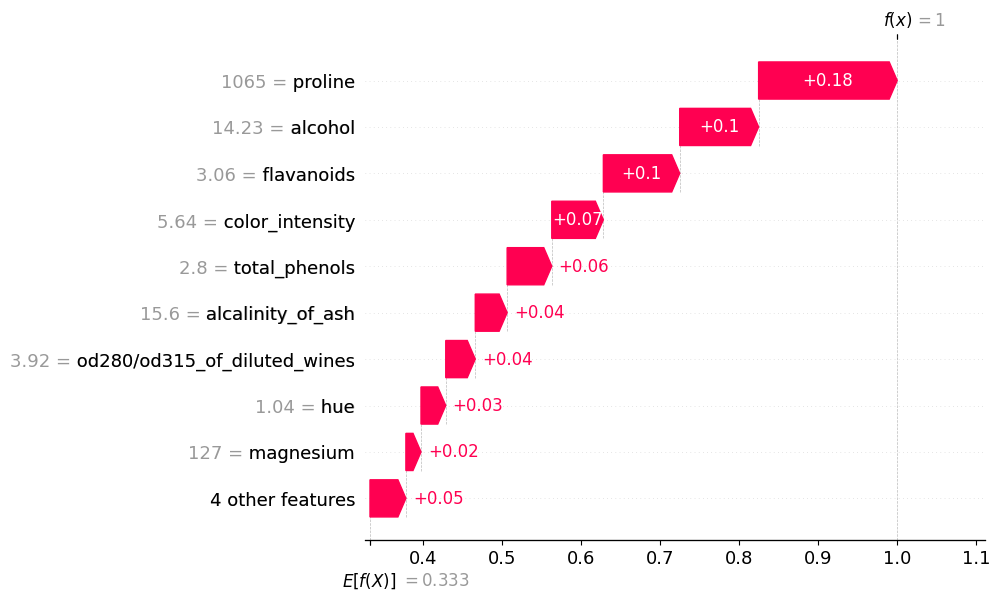

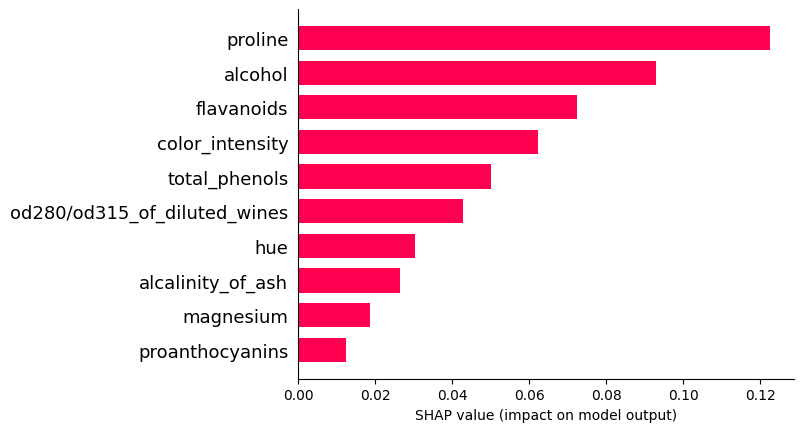

In [ ]:
# import numpy as np
# import shap
# from treeinterpreter import treeinterpreter as ti
# from sklearn.datasets import load_wine
# from sklearn.ensemble import RandomForestClassifier

# # Load the Wine dataset
# data = load_wine()
# X, y = data.data, data.target
# model = RandomForestClassifier()
# model.fit(X, y)

# # Use treeinterpreter to get the prediction, bias, and contributions
# prediction, bias, contributions = ti.predict(model, X)

# # Instead of averaging, let's use the contributions for a specific class (e.g., class 0)
# shap_values = contributions[:, :, 0]  # Choose class 0 for visualization
# base_values = bias[:, 0]  # Use bias for the same class

# # Check data integrity again
# print(f"Shape of SHAP values: {shap_values.shape}")
# print(f"Summary of SHAP values:\n{np.sum(shap_values, axis=0)}")

# # Creating a SHAP Explanation object
# explainer = shap.Explainer(model)
# shap_object = shap.Explanation(
#     values=shap_values,
#     base_values=base_values,
#     data=X,
#     feature_names=data.feature_names
# )

# # Set a reasonable plot size and adjust visualization as needed
# shap.summary_plot(shap_object.values, shap_object.data, feature_names=shap_object.feature_names, plot_size=(10, 6))
# shap.waterfall_plot(shap_object[0])  # Example for the first instance

# mean_abs_shap_values = np.abs(shap_object.values).mean(axis=0)
# shap.bar_plot(mean_abs_shap_values, feature_names=shap_object.feature_names, max_display=10)

## Example 3

Class 0 SHAP Visualizations:


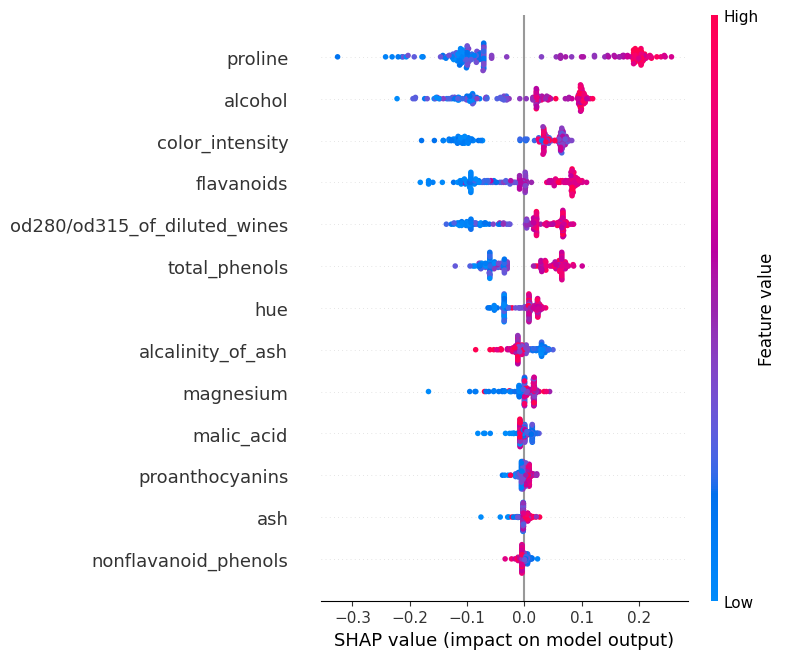

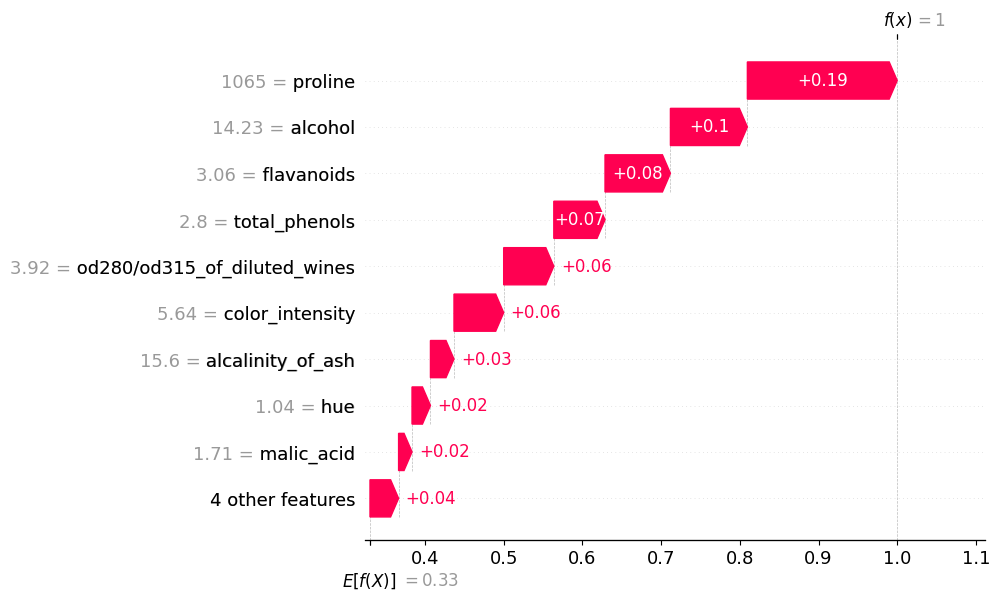

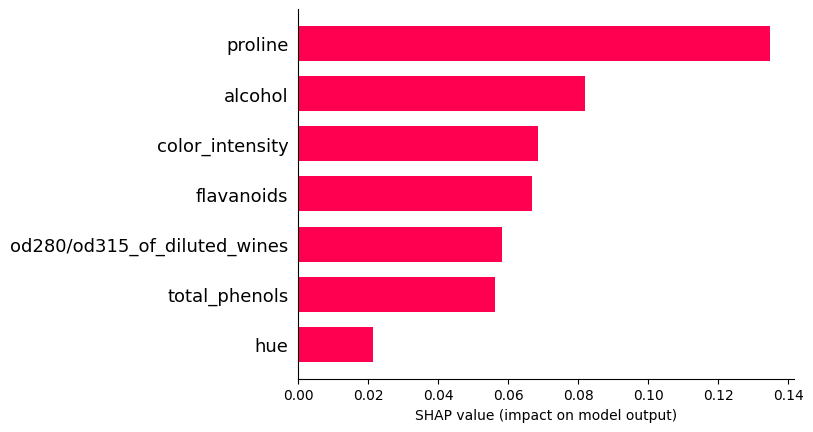


Class 1 SHAP Visualizations:


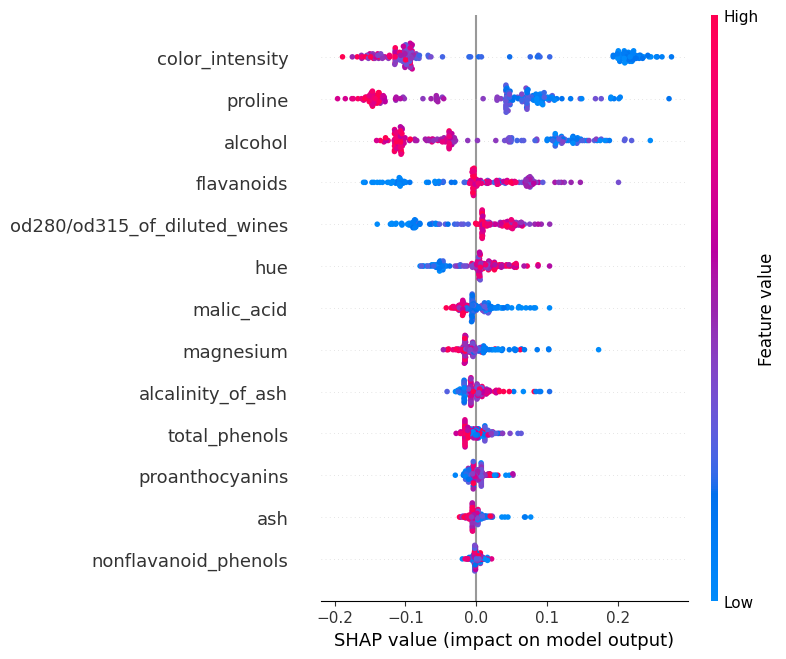

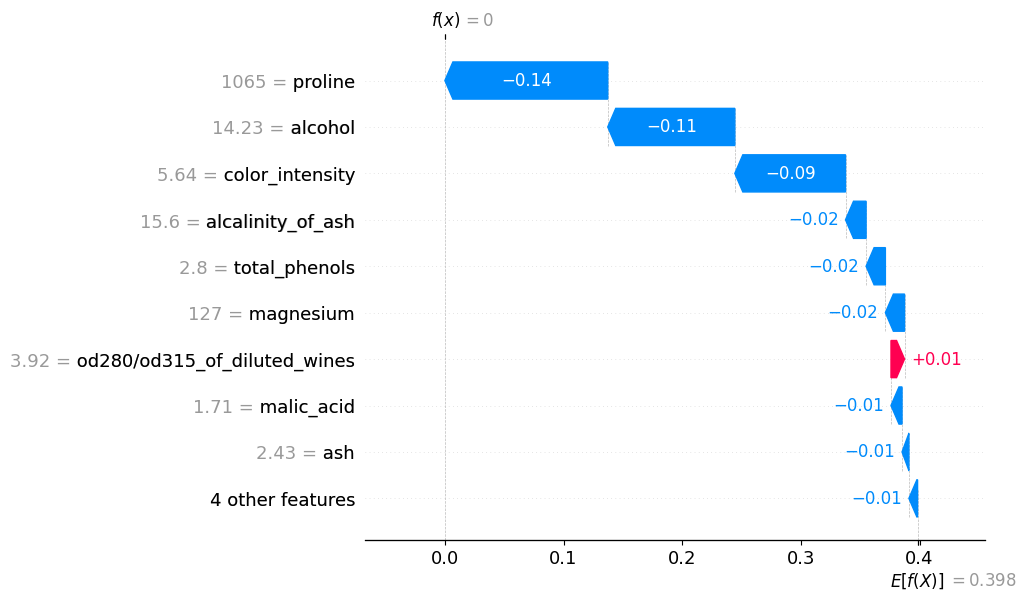

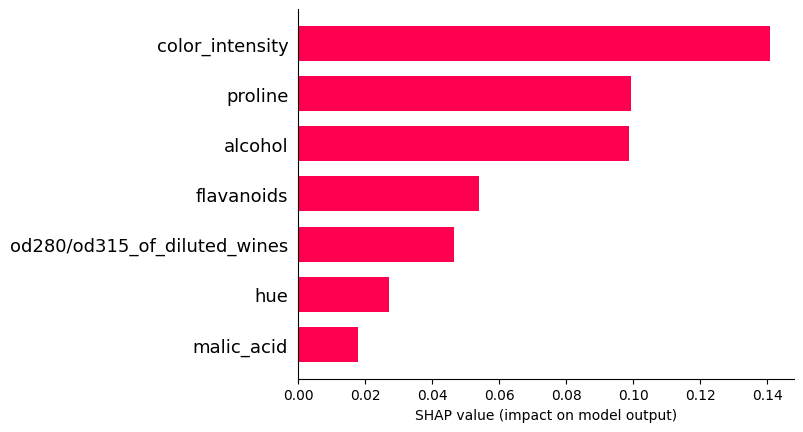

In [ ]:
import numpy as np
import shap
from treeinterpreter import treeinterpreter as ti
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load the Wine dataset
data = load_wine()
X, y = data.data, data.target
model = RandomForestClassifier()
model.fit(X, y)

# Use treeinterpreter to get the prediction, bias, and contributions
prediction, bias, contributions = ti.predict(model, X)

# Select SHAP values for two different classes
shap_values_class_0 = contributions[:, :, 0]  # Class 0
shap_values_class_1 = contributions[:, :, 1]  # Class 1

# Base values for each class
base_values_class_0 = bias[:, 0]
base_values_class_1 = bias[:, 1]

# Create SHAP Explanation objects for each class
explainer = shap.Explainer(model)
shap_object_class_0 = shap.Explanation(
    values=shap_values_class_0,
    base_values=base_values_class_0,
    data=X,
    feature_names=data.feature_names
)

shap_object_class_1 = shap.Explanation(
    values=shap_values_class_1,
    base_values=base_values_class_1,
    data=X,
    feature_names=data.feature_names
)

# Plotting SHAP visuals for Class 0
print("Class 0 SHAP Visualizations:")
shap.summary_plot(shap_object_class_0.values, shap_object_class_0.data, feature_names=shap_object_class_0.feature_names)
shap.waterfall_plot(shap_object_class_0[0], max_display=10)
mean_abs_shap_values_class_0 = np.abs(shap_object_class_0.values).mean(axis=0)
shap.bar_plot(mean_abs_shap_values_class_0, feature_names=shap_object_class_0.feature_names)

# Plotting SHAP visuals for Class 1
print("\nClass 1 SHAP Visualizations:")
shap.summary_plot(shap_object_class_1.values, shap_object_class_1.data, feature_names=shap_object_class_1.feature_names)
shap.waterfall_plot(shap_object_class_1[0], max_display=10)
mean_abs_shap_values_class_1 = np.abs(shap_object_class_1.values).mean(axis=0)
shap.bar_plot(mean_abs_shap_values_class_1, feature_names=shap_object_class_1.feature_names)